# Test graphics

In [1]:
import pandas as pd

In [21]:
test_results_file = "test_results.xlsx"
data_70 = pd.read_excel(test_results_file, sheet_name='test_70', header=0)
data_100 = pd.read_excel(test_results_file, sheet_name='test_100', header=0)

In [22]:
data_70.head()

,block,num_tracks_70,P_70_cap_rate,P_70_read_acc,P_70_f1,C_70_cap_rate,C_70_read_acc,C_70_f1,A_70_cap_rate,A_70_read_acc,A_70_f1
0,1,155,0.8323,0.9104,0.8188,0.8581,0.8921,0.8294,0.8323,0.8905,0.8243
1,2,121,0.8843,0.9720,0.9004,0.9008,0.9545,0.8974,0.8926,0.9633,0.9130
2,3,161,0.7205,0.9145,0.7670,0.7516,0.9262,0.7958,0.7391,0.9333,0.7972
3,4,158,0.8354,0.9275,0.8620,0.8354,0.9209,0.8591,0.8418,0.9065,0.8456
4,5,169,0.7456,0.9764,0.8322,0.7811,0.9778,0.8627,0.7870,0.9778,0.8656


In [23]:
data_100.head()

,block,num_tracks_100,P_100_cap_rate,P_100_read_acc,P_100_f1,C_100_cap_rate,C_100_read_acc,C_100_f1,A_100_cap_rate,A_100_read_acc,A_100_f1
0,1,332,0.8825,0.9241,0.8472,0.8855,0.9183,0.8567,0.8735,0.9052,0.8510
1,2,188,0.8670,0.9632,0.8771,0.8670,0.9515,0.8674,0.8617,0.9571,0.8764
2,3,301,0.7940,0.9208,0.8140,0.8040,0.9300,0.8294,0.7973,0.9336,0.8303
3,4,276,0.8986,0.9157,0.8803,0.8804,0.9180,0.8720,0.8768,0.9059,0.8619
4,5,256,0.7969,0.9660,0.8504,0.7969,0.9710,0.8590,0.7930,0.9707,0.8541


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
list(data_70.columns)

['block',
 'num_tracks_70',
 'P_70_cap_rate',
 'P_70_read_acc',
 'P_70_f1',
 'C_70_cap_rate',
 'C_70_read_acc',
 'C_70_f1',
 'A_70_cap_rate',
 'A_70_read_acc',
 'A_70_f1']

In [132]:
import numpy as np

def plot_by_metric_2(data, n, metric_name, i, j, tcks=10):
    plt.figure(figsize=(20,5))
    plt.grid()
    colors = ['green','blue','red']

    x_name = f'num_tracks_{n}'
    y_names = [f'{a}_{n}_{metric_name}' for a in 'PCA']
    
    df = data[i:j][['block',x_name]+y_names].sort_values(by=[x_name])
    x = df[x_name].values
    plt.xticks(np.arange(x.min(), x.max(), tcks))
    bl = df['block'].values

    for i, nm in enumerate(y_names):
        y = df[nm].values
        plt.plot(x, y, '-', marker='o', markersize=6, linewidth=1, label=nm, color=colors[i])

        z = [data[nm][j]] * len(x)
        plt.plot(x, z, '--', linewidth=1, label=f'aver_{nm}', color=colors[i])

        for x_, y_, bl_ in zip(x, y, bl):
            plt.text(x_+1, y_, str(bl_), color=colors[i], fontsize=16)
    
    plt.legend(loc='best', borderaxespad=0.)
    plt.title(metric_name, fontsize=18)
    plt.ylabel(metric_name)
    plt.xlabel(x_name)
    plt.show()

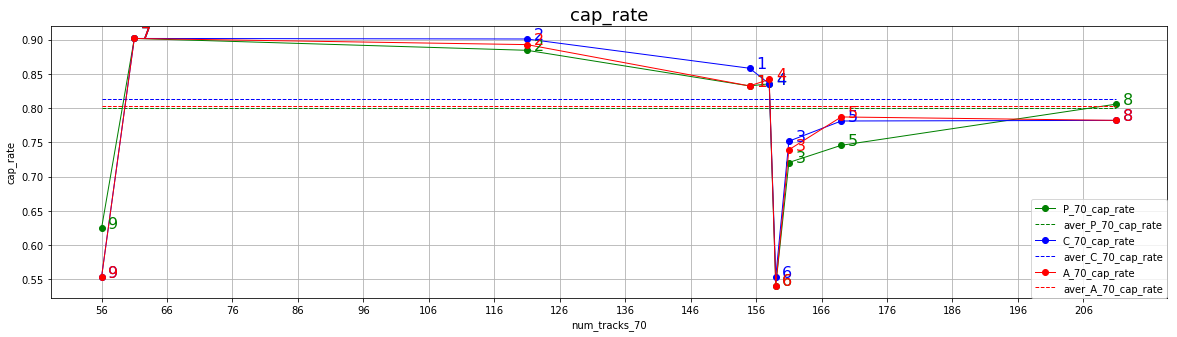

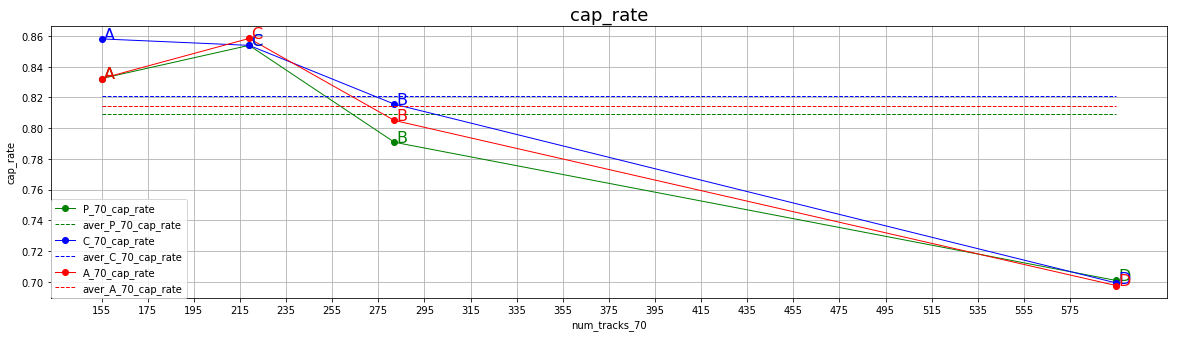

In [133]:
plot_by_metric_2(data_70, 70, 'cap_rate', 0, 9, tcks=10)
plot_by_metric_2(data_70, 70, 'cap_rate', 10, 14, tcks=20)

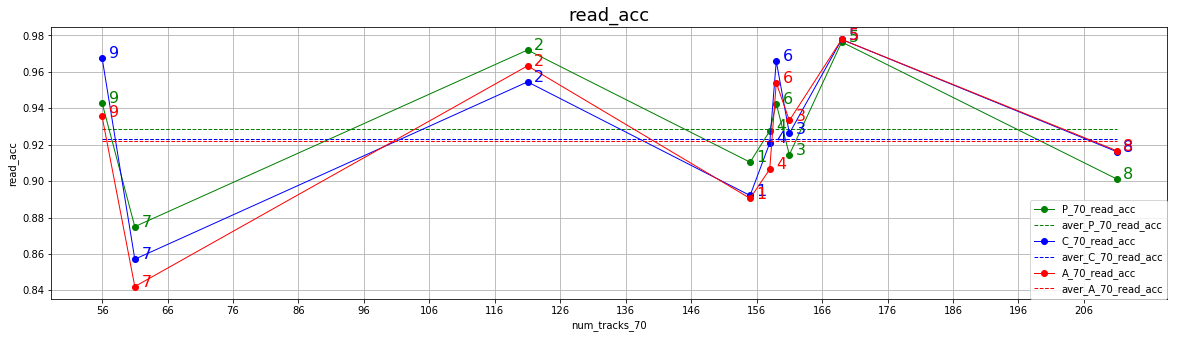

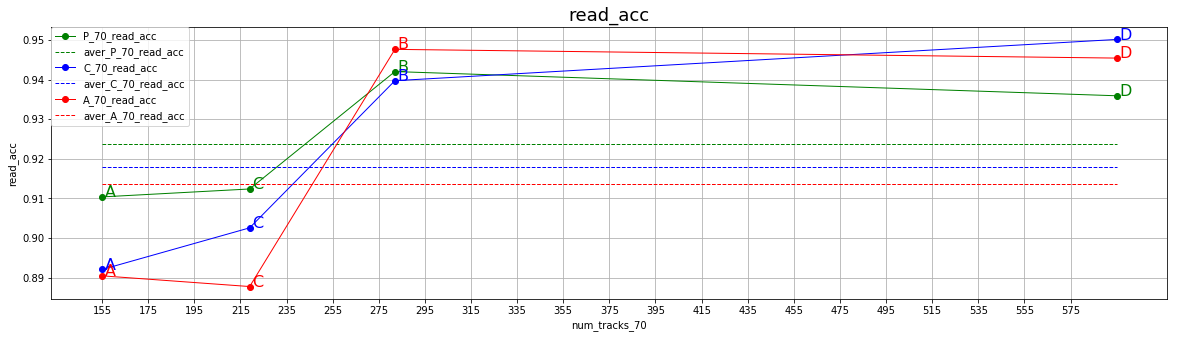

In [135]:
plot_by_metric_2(data_70, 70, 'read_acc', 0, 9, tcks=10)
plot_by_metric_2(data_70, 70, 'read_acc', 10, 14, tcks=20)

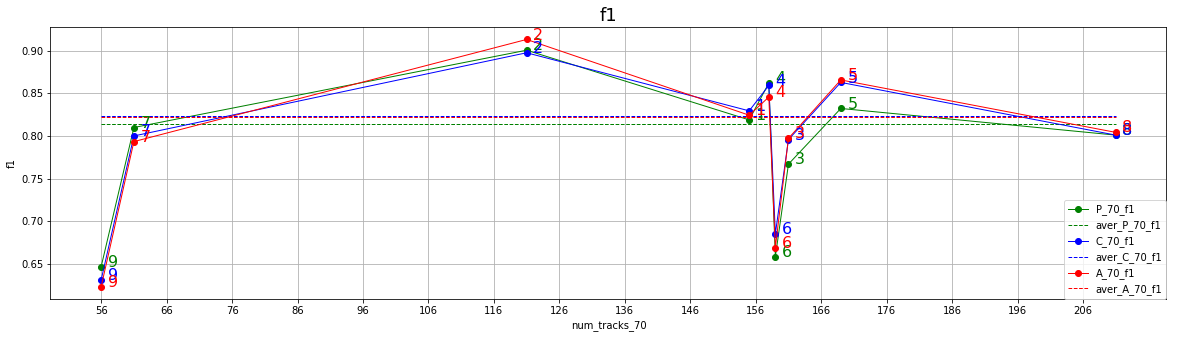

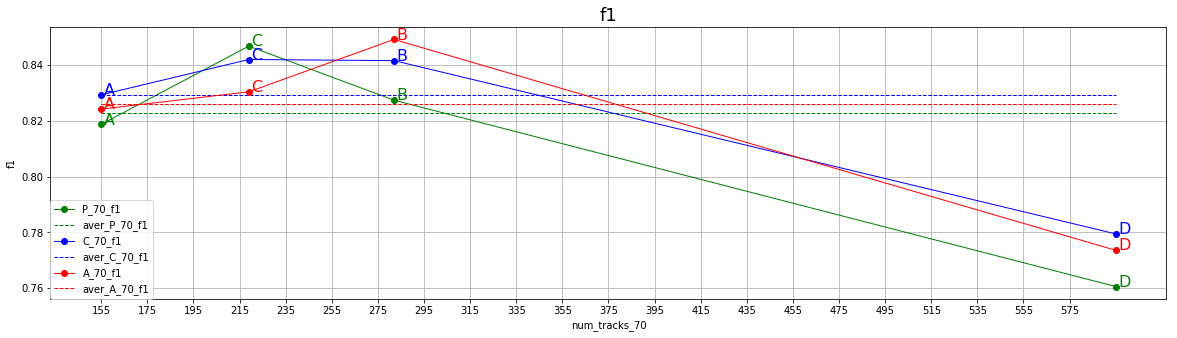

In [136]:
plot_by_metric_2(data_70, 70, 'f1', 0, 9, tcks=10)
plot_by_metric_2(data_70, 70, 'f1', 10, 14, tcks=20)

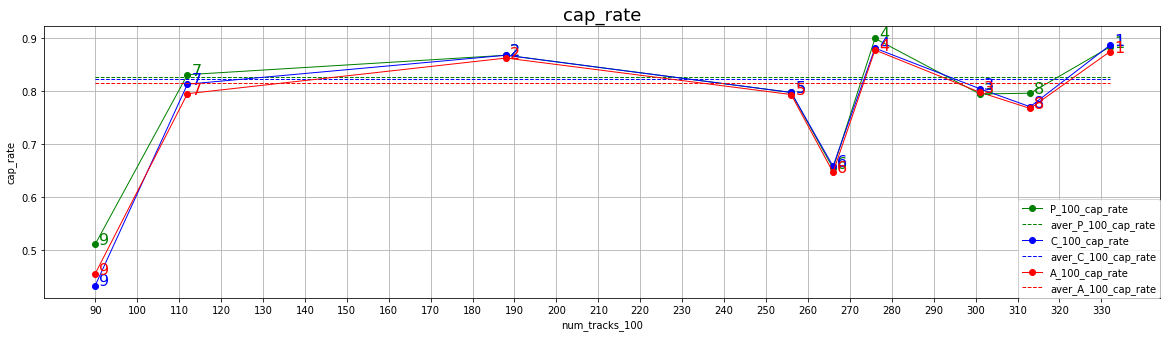

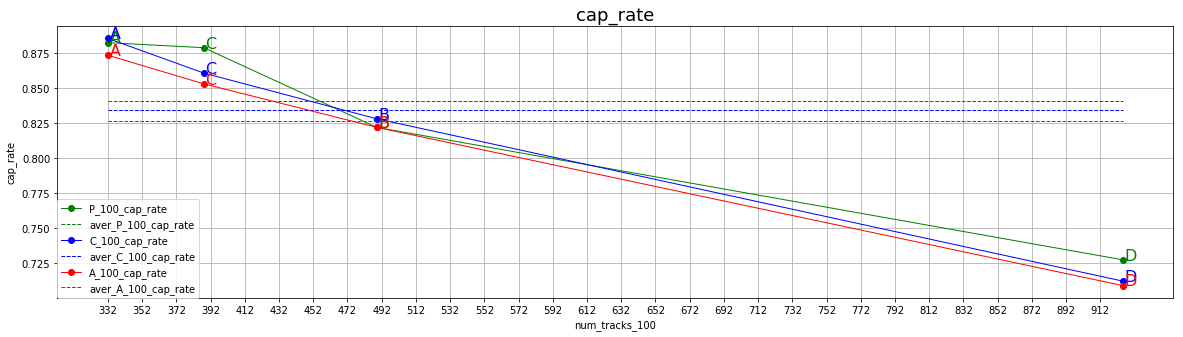

In [137]:
plot_by_metric_2(data_100, 100, 'cap_rate', 0, 9, tcks=10)
plot_by_metric_2(data_100, 100, 'cap_rate', 10, 14, tcks=20)

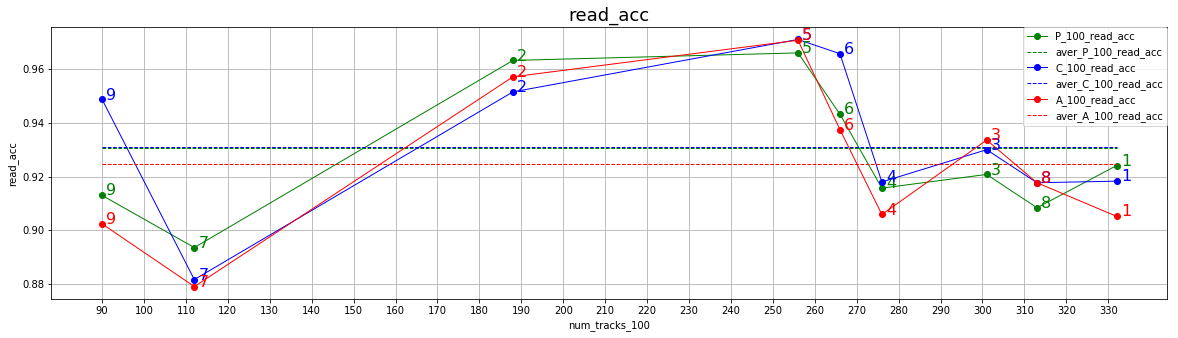

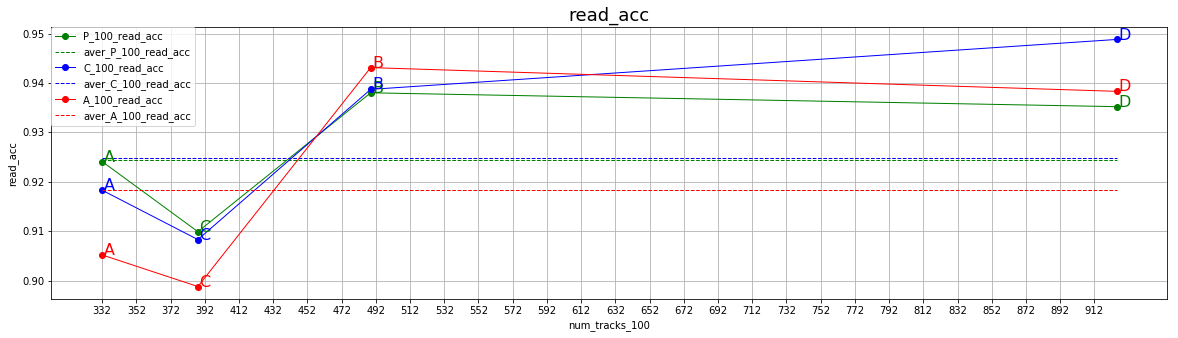

In [138]:
plot_by_metric_2(data_100, 100, 'read_acc', 0, 9, tcks=10)
plot_by_metric_2(data_100, 100, 'read_acc', 10, 14, tcks=20)

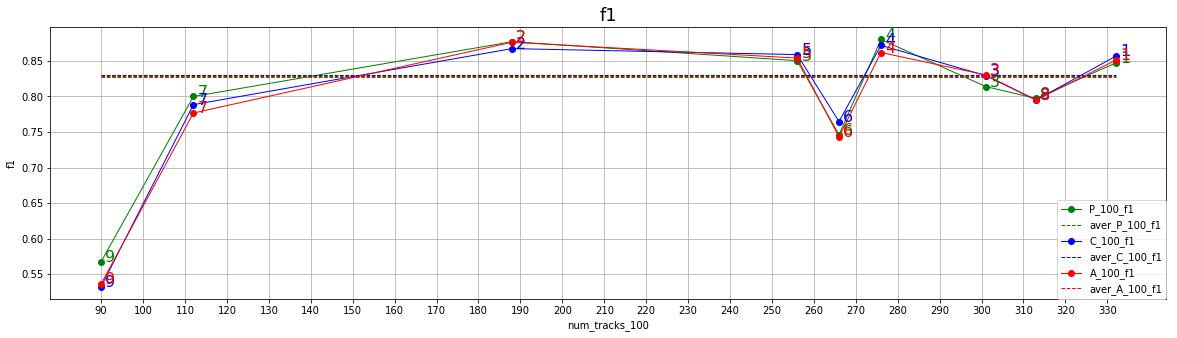

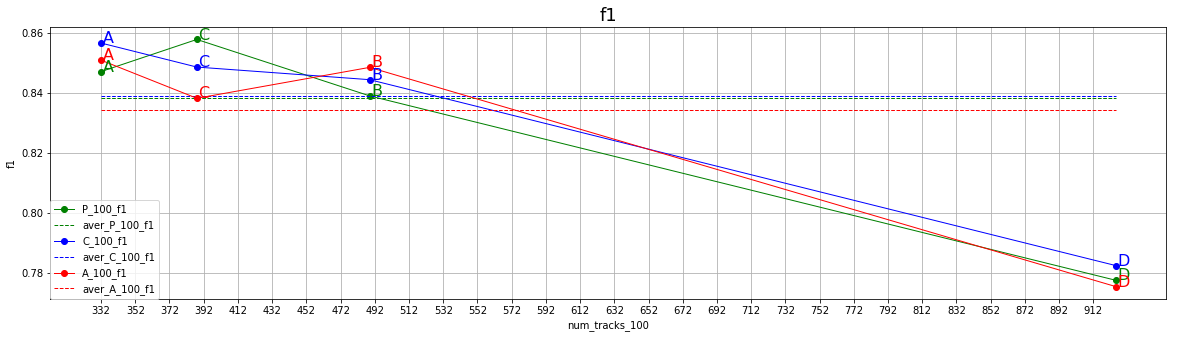

In [139]:
plot_by_metric_2(data_100, 100, 'f1', 0, 9, tcks=10)
plot_by_metric_2(data_100, 100, 'f1', 10, 14, tcks=20)

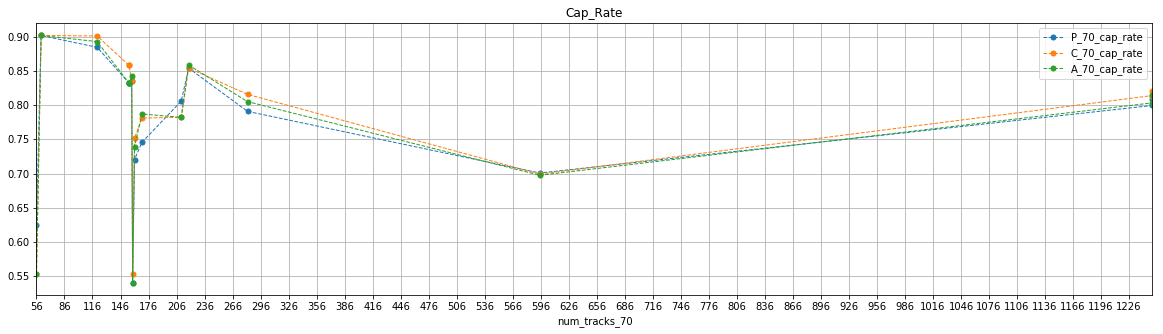

In [64]:
def plot_by_metric(data, n, metric_name):
    x_name = f'num_tracks_{n}'
    y_names = [f'{a}_{n}_{metric_name}' for a in 'PCA']
    df = data.sort_values(by=[x_name])
    x = data[x_name]
    ticks = list(range(x.min(), x.max(), 30))
    df.plot(x=x_name, y=y_names, figsize=(20,5), grid=True, 
            style="o--", ms=5, lw=1, title=metric_name.title(), 
            xticks=ticks)
plot_by_metric(data_70, 70, 'cap_rate')

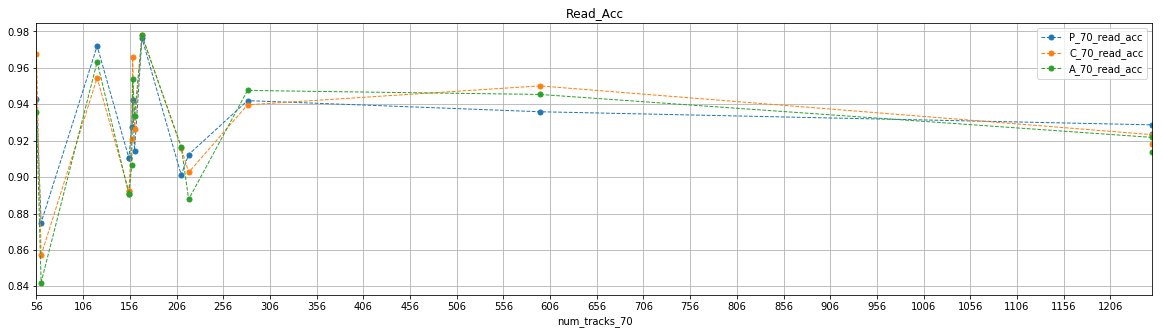

In [57]:
plot_by_metric(data_70, 70, 'read_acc')

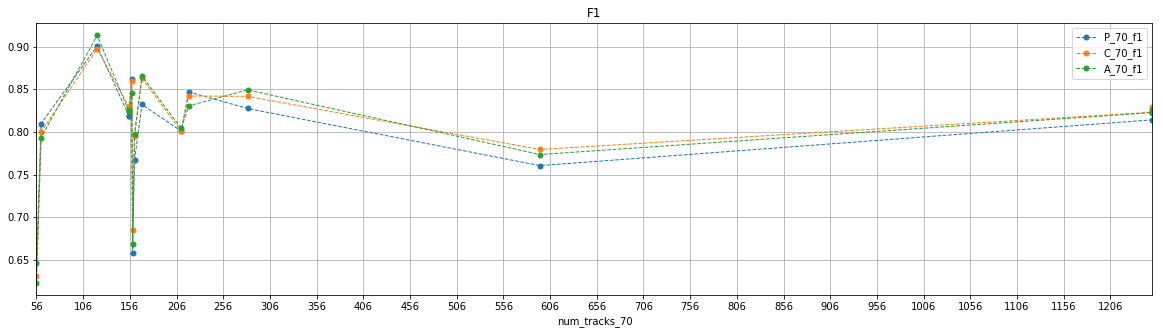

In [58]:
plot_by_metric(data_70, 70, 'f1')